In [101]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

seed = 36

%matplotlib inline

In [102]:
path = "./archive/KNNAlgorithmDataset.csv"
df_raw = pd.read_csv(path)
df_raw.shape

(569, 33)

In [103]:
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [104]:
df_raw.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [105]:
df = df_raw.copy()
df.shape

(569, 33)

In [108]:
cost_matrix = np.array([[0,5],[1,0]])
print('Nếu tin dụng xẫu được phần là xau, chi phi:', cost_matrix[0][0])
print('Neu tin dụng xau duợc phan la tot, chi phi:', cost_matrix[0][1])
print('Neu tin dung tot duợc phan la xau, chi phi:', cost_matrix[1][0])
print('Neu tin dung tot đuợc phan la tot, chi phi:', cost_matrix[1][1])

Nếu tin dụng xẫu được phần là xau, chi phi: 0
Neu tin dụng xau duợc phan la tot, chi phi: 5
Neu tin dung tot duợc phan la xau, chi phi: 1
Neu tin dung tot đuợc phan la tot, chi phi: 0


In [109]:
data_array = np.genfromtxt('./archive/german.data-numeric')
data_frame = df = pd.DataFrame(data_array, columns=['A' + str(i) for i in range(1, 25)] + ['label'])

data_frame['label'] = data_frame['label'].replace(2, 0)
data_frame

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,label
0,1.0,6.0,4.0,12.0,5.0,5.0,3.0,4.0,1.0,67.0,3.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2.0,48.0,2.0,60.0,1.0,3.0,2.0,2.0,1.0,22.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4.0,12.0,4.0,21.0,1.0,4.0,3.0,3.0,1.0,49.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,42.0,2.0,79.0,1.0,4.0,3.0,4.0,2.0,45.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,24.0,3.0,49.0,1.0,3.0,3.0,4.0,4.0,53.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,12.0,2.0,17.0,1.0,4.0,2.0,4.0,1.0,31.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
996,1.0,30.0,2.0,39.0,1.0,3.0,1.0,4.0,2.0,40.0,3.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,4.0,12.0,2.0,8.0,1.0,5.0,3.0,4.0,3.0,38.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
998,1.0,45.0,2.0,18.0,1.0,3.0,3.0,4.0,4.0,23.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      1000 non-null   float64
 1   A2      1000 non-null   float64
 2   A3      1000 non-null   float64
 3   A4      1000 non-null   float64
 4   A5      1000 non-null   float64
 5   A6      1000 non-null   float64
 6   A7      1000 non-null   float64
 7   A8      1000 non-null   float64
 8   A9      1000 non-null   float64
 9   A10     1000 non-null   float64
 10  A11     1000 non-null   float64
 11  A12     1000 non-null   float64
 12  A13     1000 non-null   float64
 13  A14     1000 non-null   float64
 14  A15     1000 non-null   float64
 15  A16     1000 non-null   float64
 16  A17     1000 non-null   float64
 17  A18     1000 non-null   float64
 18  A19     1000 non-null   float64
 19  A20     1000 non-null   float64
 20  A21     1000 non-null   float64
 21  A22     1000 non-null   float64
 22  A

In [111]:
data_frame.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,label
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,2.675000,1.407000,1.155000,1.404000,1.037000,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,0.700000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,0.705601,0.577654,0.362086,0.490943,0.188856,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


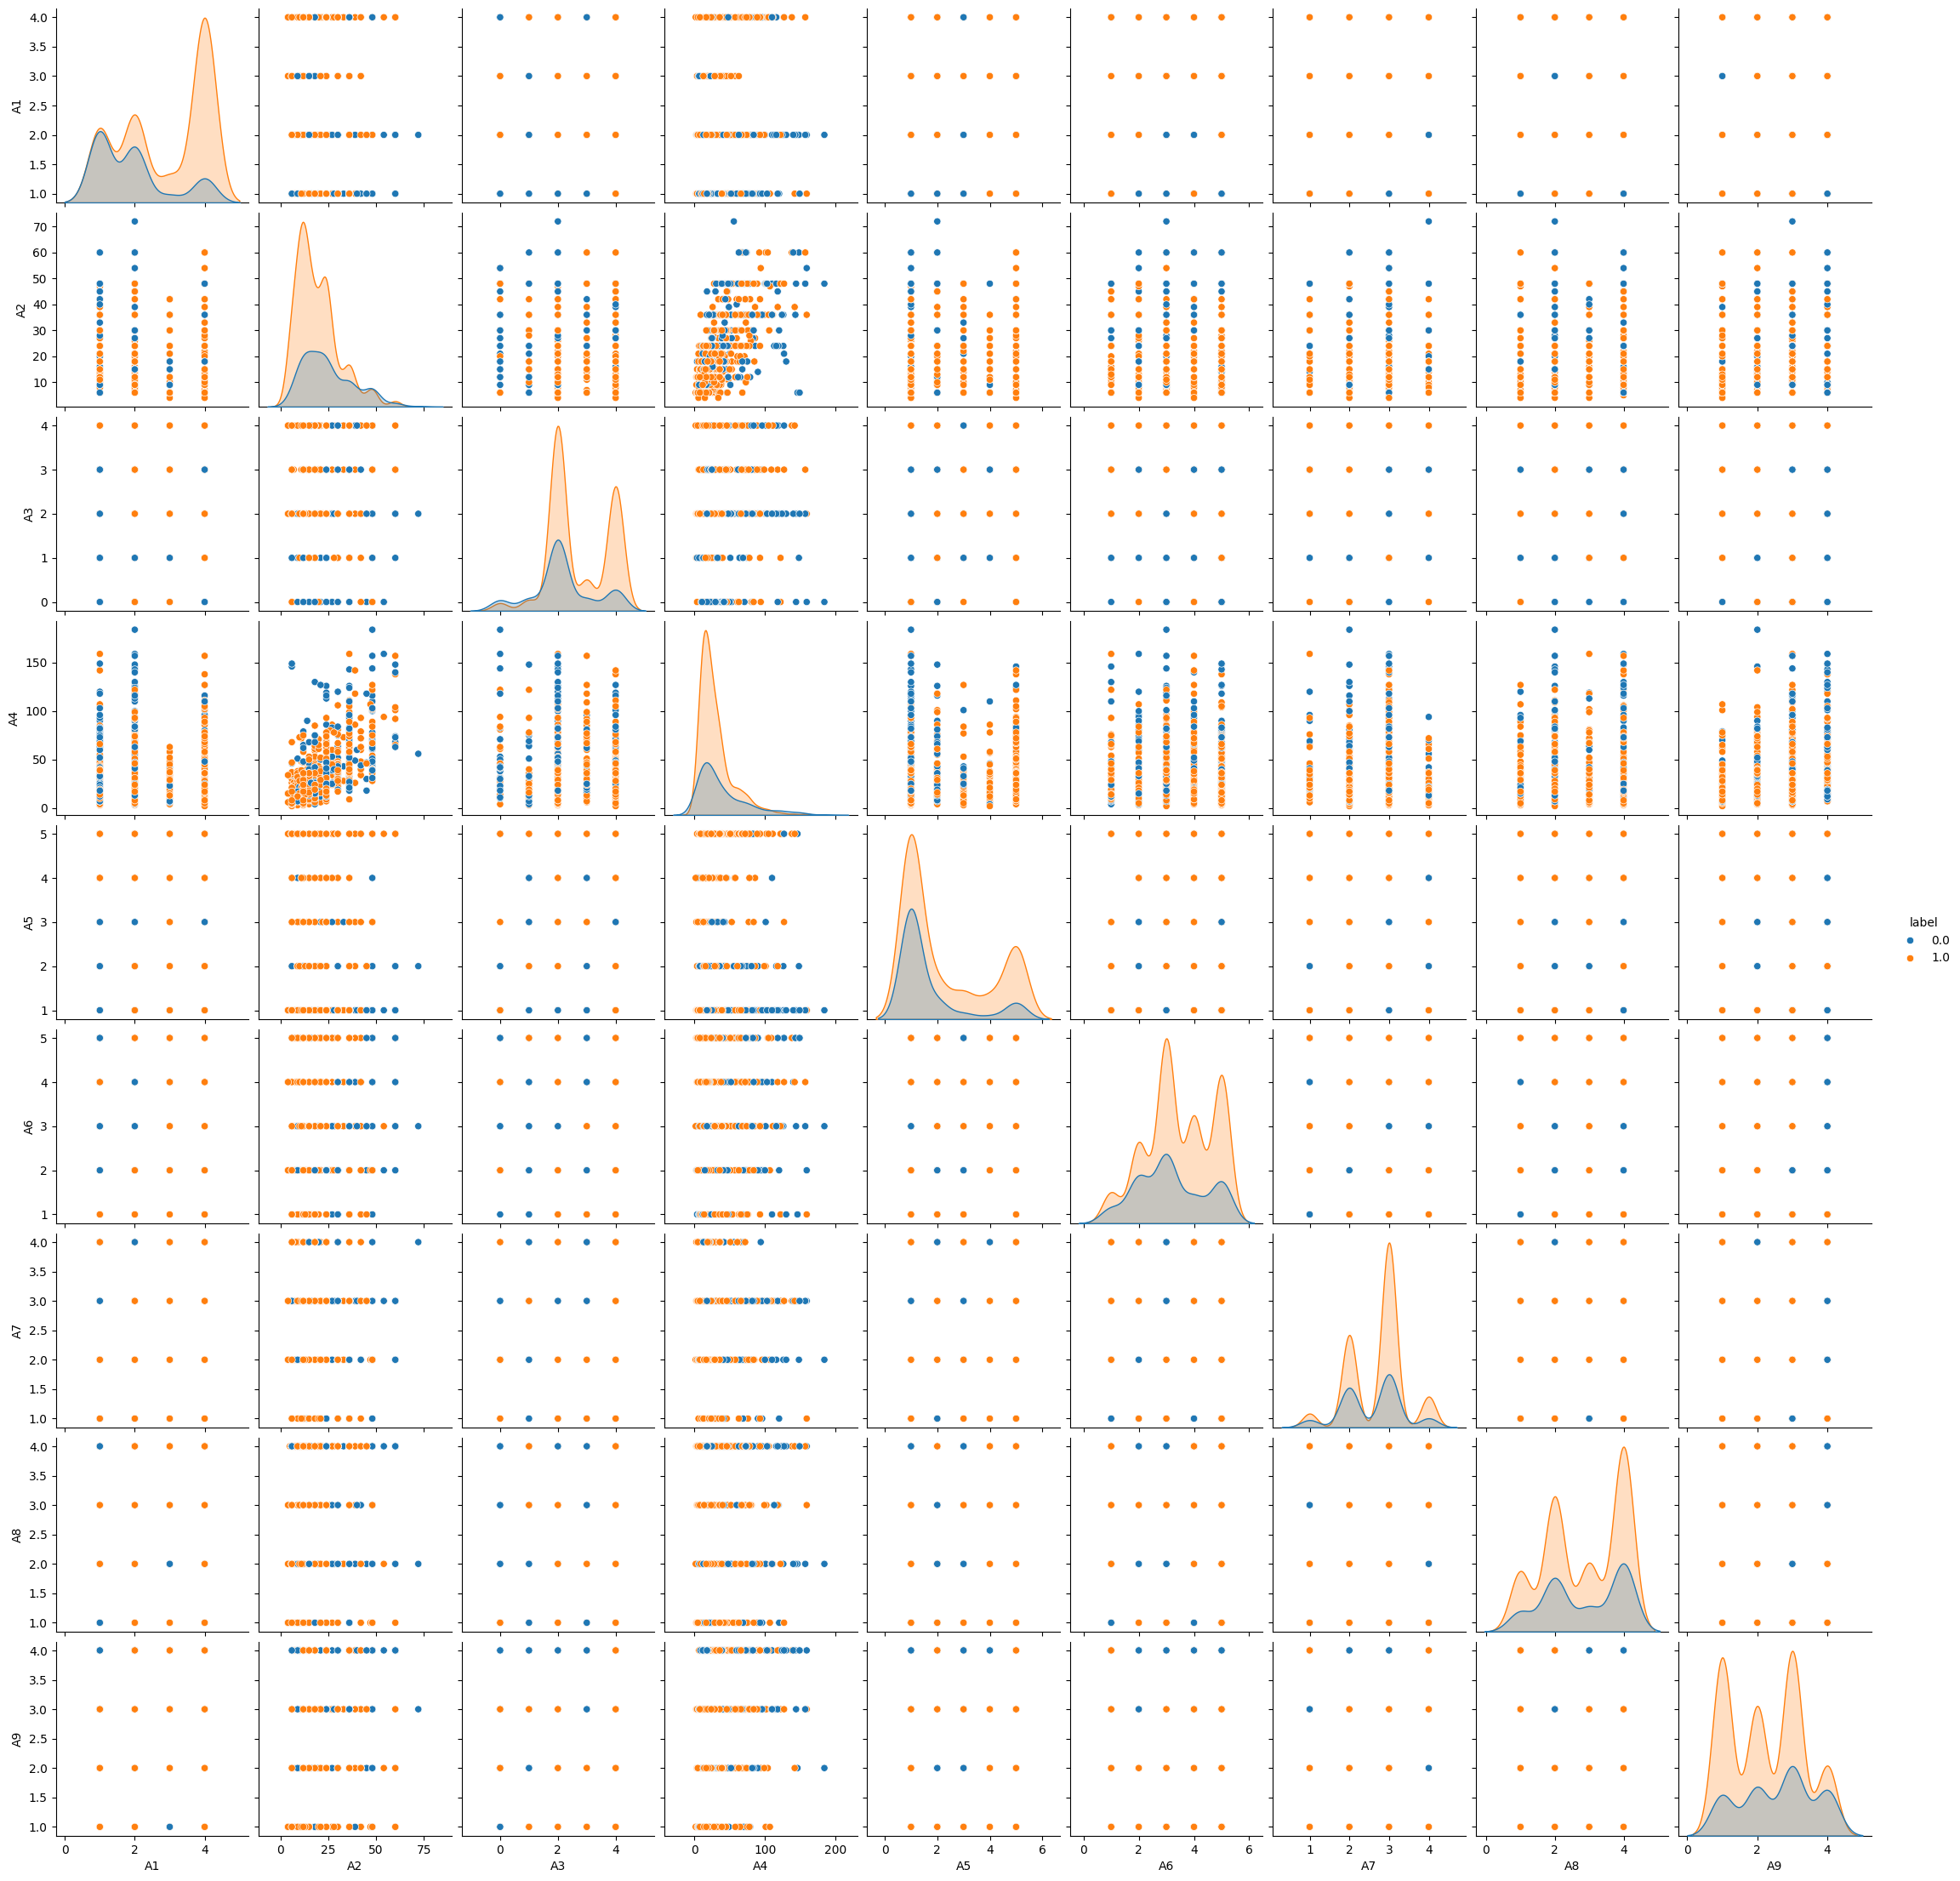

In [112]:
sns.pairplot(data_frame,
             hue='label',
             vars=['A' +str(i) for i in range(1, 10)])

<Axes: ylabel='count'>

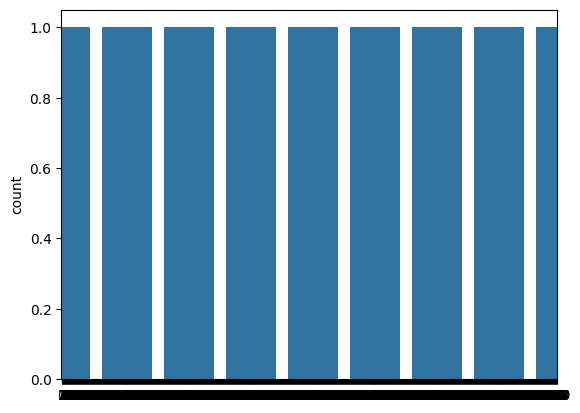

In [113]:
sns.countplot(data_frame['label'])

<Axes: >

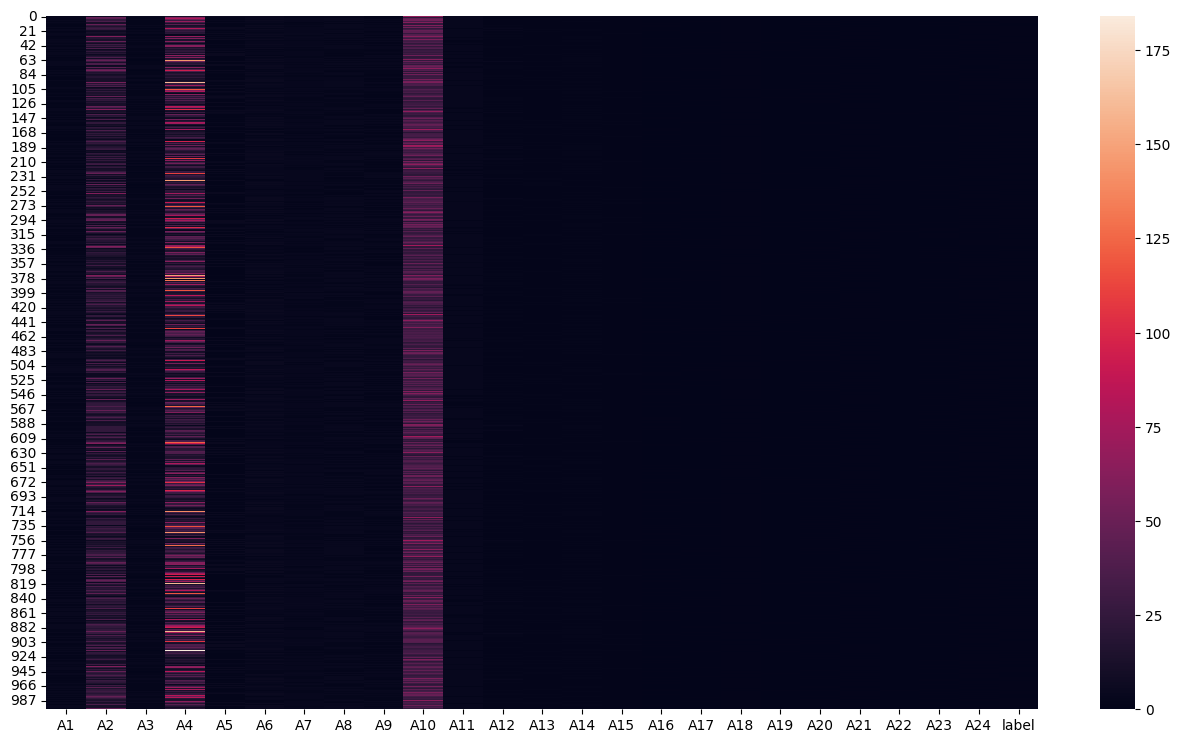

In [114]:
plt.figure(figsize=(16,9))
sns.heatmap(data_frame)

<Axes: >

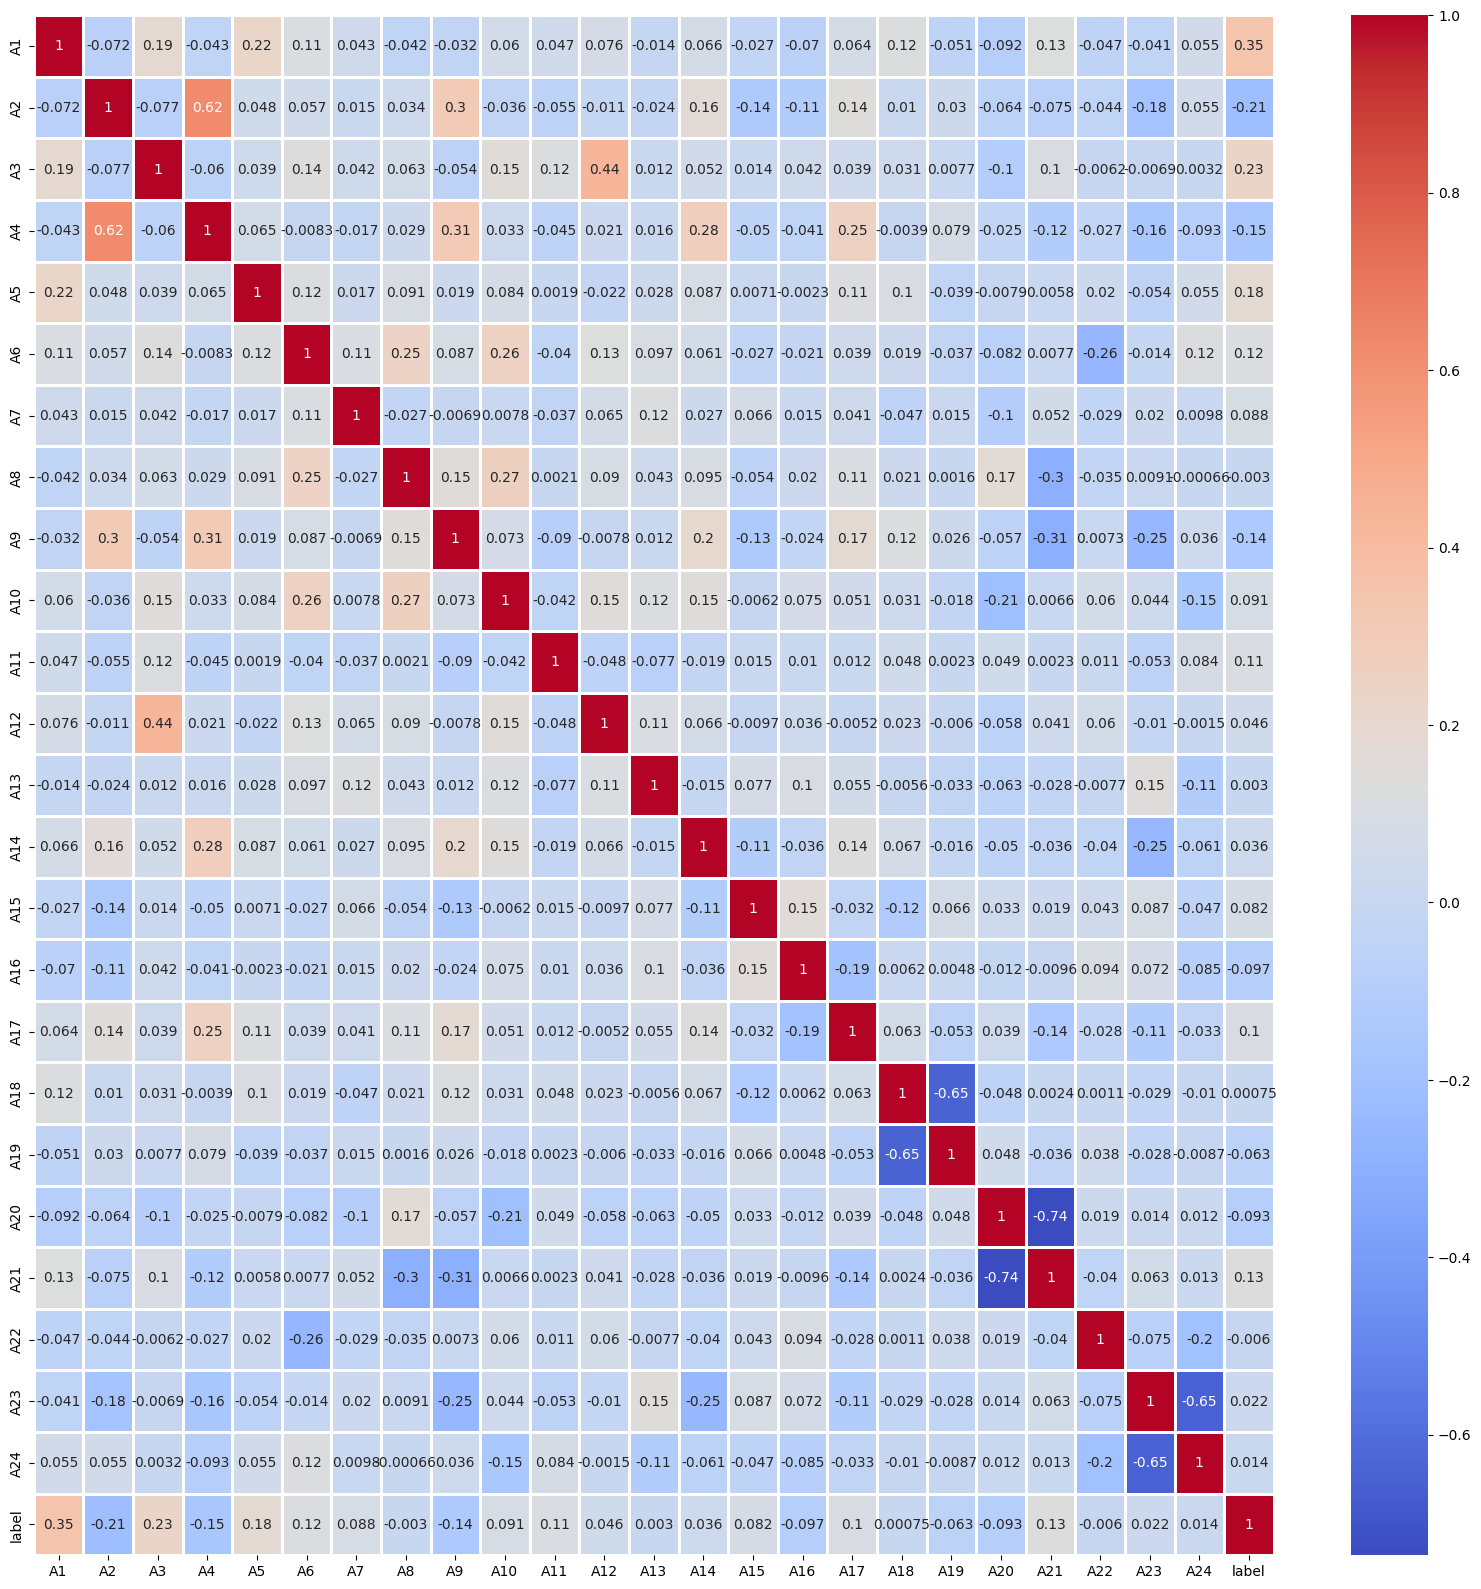

In [116]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_frame.corr(), annot= True, cmap='coolwarm', linewidths=2)

In [117]:
x =data_frame.drop(['label'], axis=1)
x = (x - x.min())/(x.max() - x.min())
x

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
0,0.000000,0.029412,1.00,0.054945,1.00,1.00,0.666667,1.000000,0.000000,0.857143,1.0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.333333,0.647059,0.50,0.318681,0.00,0.50,0.333333,0.333333,0.000000,0.053571,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.000000,0.117647,1.00,0.104396,0.00,0.75,0.666667,0.666667,0.000000,0.535714,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.558824,0.50,0.423077,0.00,0.75,0.666667,1.000000,0.333333,0.464286,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.294118,0.75,0.258242,0.00,0.50,0.666667,1.000000,1.000000,0.607143,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.50,0.082418,0.00,0.75,0.333333,1.000000,0.000000,0.214286,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
996,0.000000,0.382353,0.50,0.203297,0.00,0.50,0.000000,1.000000,0.333333,0.375000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
997,1.000000,0.117647,0.50,0.032967,0.00,1.00,0.666667,1.000000,0.666667,0.339286,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
998,0.000000,0.602941,0.50,0.087912,0.00,0.50,0.666667,1.000000,1.000000,0.071429,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
y = data_frame["label"]
y

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
995    1.0
996    1.0
997    1.0
998    0.0
999    1.0
Name: label, Length: 1000, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size= 0.2, random_state= seed)
print("training data: ", x_train.shape, y_train.shape)
print("testing data: ", x_test.shape, y_test.shape)

training data:  (800, 24) (800,)
testing data:  (200, 24) (200,)


In [121]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

In [122]:
knn_classifier = KNeighborsClassifier(n_neighbors= 10, metric="minkowski", p=2, weights='distance')
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [126]:
def cost(y_true, y_pred):
    true_pos = ((y_true == y_pred)&(y_true == 1.0))*0.0
    true_ne = ((y_true==y_pred)&(y_true == 0.0))*0.0
    false_ne = ((y_true != y_pred)&(y_true == 1.0))*1.0
    false_pos = ((y_true != y_pred)&(y_true == 0.0))*5.0
    return sum(true_pos + true_ne + false_pos + false_ne)/len(y_true)

In [128]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Testing ... \n")
y_pred_knn = knn_classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Cost: ', cost(y_test, y_pred_knn) )
# print('Precision: ", precision_score(y_test, y_pred_knn))
# print("Recall: ', recall_score(y_test, y_pred_knn))

Testing ... 

Accuracy:  0.72
Cost:  1.02


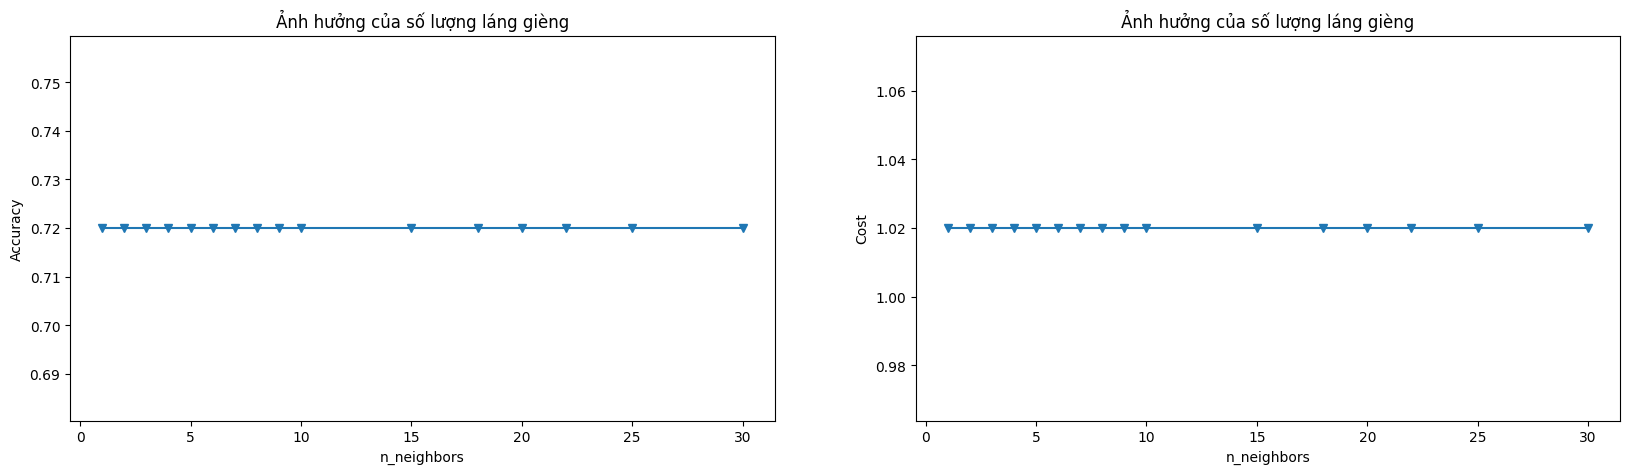

In [130]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 18, 20, 22, 25, 30]
models = []
for k in n_neighbors:
    x_train, x_test, y_train, y_test = train_test_split(x , y, test_size= 0.2, random_state= seed)
    knn_classifier.fit(x_train, y_train)
    models.append(knn_classifier)

acc = []
c = []
for model in models:
    y_pred = model.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    c.append(cost(y_test, y_pred))

# Visualize
fig, axs = plt.subplots(1, 2, figsize = (20, 5))

axs[0].plot(n_neighbors, acc, marker= "v")
axs[0].set_xlabel("n_neighbors") 
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Ảnh hưởng của số lượng láng gièng")

axs[1].plot(n_neighbors, c, marker= "v")
axs[1].set_xlabel("n_neighbors")
axs[1].set_ylabel("Cost")
axs[1].set_title("Ảnh hưởng của số lượng láng gièng")

plt.show()